In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data65


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 122kB 14.6MB/s eta 0:00:01


In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

# **深度学习基础知识**
1.相关损失函数补充  
2.相关损失函数的算法python实现  
3.池化方法及其算法补充  
4.数据增强方法修改及其补充  
5.图像分类方法综述  

### *1.相关损失函数补充*  
> https://zhuanlan.zhihu.com/p/58883095  
为了方便以前，以下仅列出几个补充的损失函数。  
##### 1. 0-1损失函数(zero-one loss)  
0-1损失是指预测值和目标值不相等为1， 否则为0:  
![](https://ai-studio-static-online.cdn.bcebos.com/4266dde9f32b4547b3e9f350a64f499ceaca464683c04bd5aeebda8a1d33c898)  
特点：)0-1损失函数直接对应分类判断错误的个数，但是它是一个非凸函数，不太适用.
##### 2. 绝对值损失函数
绝对值损失函数是计算预测值与目标值的差的绝对值：  
![](https://ai-studio-static-online.cdn.bcebos.com/c755ae183fc34468ac65596f13eacc263e01133bc181461e8047631ac35a649f)
##### 3. log对数损失函数  
log对数损失函数的标准形式如下：
![](https://ai-studio-static-online.cdn.bcebos.com/8066155e30564bab869f63e2616b42d55468ff6425154ad5b62fd398050e7a58)  

特点：

(1) log对数损失函数能非常好的表征概率分布，在很多场景尤其是多分类，如果需要知道结果属于每个类别的置信度，那它非常适合。

(2)健壮性不强，相比于hinge loss对噪声更敏感。

(3)逻辑回归的损失函数就是log对数损失函数。
##### 4. Hinge 损失函数
Hinge损失函数标准形式如下：  
![](https://ai-studio-static-online.cdn.bcebos.com/036eef2725b14c8a93dd00b52c9168b9e1cb0212fa3c4b7db3ef99da609cf722)  
特点：

(1)hinge损失函数表示如果被分类正确，损失为0，否则损失就为 [公式] 。SVM就是使用这个损失函数。

(2)一般的 [公式] 是预测值，在-1到1之间， [公式] 是目标值(-1或1)。其含义是， [公式] 的值在-1和+1之间就可以了，并不鼓励 [公式] ，即并不鼓励分类器过度自信，让某个正确分类的样本距离分割线超过1并不会有任何奖励，从而使分类器可以更专注于整体的误差。

(3) 健壮性相对较高，对异常点、噪声不敏感，但它没太好的概率解释。  

##### 5. 感知损失(perceptron loss)函数  
![](https://ai-studio-static-online.cdn.bcebos.com/bfbe42633122456cbb143061583106a860645c42d55244898f390c76a6ca9e75)  
特点：

(1)是Hinge损失函数的一个变种，Hinge loss对判定边界附近的点(正确端)惩罚力度很高。而perceptron loss只要样本的判定类别正确的话，它就满意，不管其判定边界的距离。它比Hinge loss简单，因为不是max-margin boundary，所以模型的泛化能力没 hinge loss强。



### *2.相关损失函数的算法python实现*

1.0-1损失函数  
```
def function(fx,y):
    if fx==y:
        return 1
    else:
        return 0
```

2.绝对值损失函数  
```
def function(fx,y):
    return np.abs(Fx,y)
```

3.log对数损失函数：  
```
# P_y_x表示在给定x条件下y的条件概率
def function(y,P_y_x):
    return -np.log(P_y_x)
```  

4.Hinge损失函数：
```
def function(y,fx):
    return np.max(0,1-y*fx)
```

5.感知损失函数
```
def function(y,fx):
    return np.max(0,-fx)
```


### *3.池化方法及其算法补充*  
> https://www.cnblogs.com/d0main/p/8419453.html  
> http://www.360doc.com/content/18/1011/19/54525756_793916758.shtml  

pooling层对filters的抽取结果进行降维操作，获得样本的重要特征，为下一次的卷积增加感受野的大小，逐渐减小＂分辨率＂, 为最后的全连接做准备。pooling层是CNN中用来减小尺寸，提高运算速度的，同样能减小噪声的影响，让各特征更具有健壮性。降维操作方式的不同产生不同的池化方法。

下面列举几种常见的pooling方法。
1.一般池化（General Pooling）
池化作用于图像中不重合的区域（这与卷积操作不同），过程如下图。  
定义池化窗口的大小为sizeX，即下图中红色正方形的边长，定义两个相邻池化窗口的水平位移/竖直位移为stride。一般池化由于每一池化窗口都是不重复的，所以sizeX=stride。  
![](https://ai-studio-static-online.cdn.bcebos.com/17f93778176d4eafbe121bd48ec38b79eec22cffa61b4384b8444070efba4e98)  
最常见的池化操作为平均池化mean pooling和最大池化max pooling：

平均池化：计算图像区域的平均值作为该区域池化后的值。

最大池化：选图像区域的最大值作为该区域池化后的值。

2.重叠池化（OverlappingPooling）  
重叠池化正如其名字所说的，相邻池化窗口之间会有重叠区域，此时sizeX>stride。

3.空金字塔池化（Spatial Pyramid Pooling）  
空间金字塔池化可以把任何尺度的图像的卷积特征转化成相同维度，这不仅可以让CNN处理任意尺度的图像，还能避免cropping和warping操作，导致一些信息的丢失，具有非常重要的意义。  

一般的CNN都需要输入图像的大小是固定的，这是因为全连接层的输入需要固定输入维度，但在卷积操作是没有对图像尺度有限制，所有作者提出了空间金字塔池化，先让图像进行卷积操作，然后转化成维度相同的特征输入到全连接层，这个可以把CNN扩展到任意大小的图像。  
空间金字塔池化的思想来自于Spatial Pyramid Model，它一个pooling变成了多个scale的pooling。用不同大小池化窗口作用于卷积特征，我们可以得到1X1,2X2,4X4的池化结果，由于conv5中共有256个过滤器，所以得到1个256维的特征，4个256个特征，以及16个256维的特征，然后把这21个256维特征链接起来输入全连接层，通过这种方式把不同大小的图像转化成相同维度的特征。  
![](https://ai-studio-static-online.cdn.bcebos.com/62ef728c1aca4c01b53d94141f88106796be5f96fb4142689b3dd97908a509c8)


###  *4.数据增强方法修改及其补充*  
> https://www.zhihu.com/question/319291048  
什么是数据增强？
数据增强也叫数据扩增，意思是在不实质性的增加数据的情况下，让有限的数据产生等价于更多数据的价值。

##### 4.1 有监督的数据增强    
4.1.1 单样本的数据增强  
所谓单样本数据增强，即增强一个样本的时候，全部围绕着该样本本身进行操作，包括几何变换类，颜色变换类等。  
几何变换包括对图像进行旋转、对称、变形、缩放、裁剪等操作。几何变换类操作，没有改变图像本身的内容，它可能是选择了图像的一部分或者对像素进行了重分布。如果要改变图像本身的内容，就属于颜色变换类的数据增强了，常见的包括噪声、模糊、颜色变换、擦除、填充等等。基于噪声的数据增强就是在原来的图片的基础上，随机叠加一些噪声，最常见的做法就是高斯噪声。更复杂一点的就是在面积大小可选定、位置随机的矩形区域上丢弃像素产生黑色矩形块，从而产生一些彩色噪声，以Coarse Dropout方法为代表，甚至还可以对图片上随机选取一块区域并擦除图像信息。

4.1.2 多样本的数据增强  
不同于单样本数据增强，多样本数据增强方法利用多个样本来产生新的样本，下面介绍几种方法。  
(1) SMOTE[1]  
SMOTE即Synthetic Minority Over-sampling Technique方法，它是通过人工合成新样本来处理样本不平衡问题，从而提升分类器性能。类不平衡现象是很常见的，它指的是数据集中各类别数量不近似相等。如果样本类别之间相差很大，会影响分类器的分类效果。假设小样本数据数量极少，如仅占总体的1%，则即使小样本被错误地全部识别为大样本，在经验风险最小化策略下的分类器识别准确率仍能达到99%，但由于没有学习到小样本的特征，实际分类效果就会很差。  
(2) SamplePairing[2]  
SamplePairing方法的原理非常简单，从训练集中随机抽取两张图片分别经过基础数据增强操作(如随机翻转等)处理后经像素以取平均值的形式叠加合成一个新的样本，标签为原样本标签中的一种。这两张图片甚至不限制为同一类别，这种方法对于医学图像比较有效。  
(3) mixup[3]
mixup是Facebook人工智能研究院和MIT在“Beyond Empirical Risk Minimization”中提出的基于邻域风险最小化原则的数据增强方法，它使用线性插值得到新样本数据。  

##### 4.2 无监督的数据增强  
4.2.1 GAN  
关于GAN(generative adversarial networks)，我们已经说的太多了。它包含两个网络，一个是生成网络，一个是对抗网络，基本原理如下：(1) G是一个生成图片的网络，它接收随机的噪声z，通过噪声生成图片，记做G(z) 。(2) D是一个判别网络，判别一张图片是不是“真实的”，即是真实的图片，还是由G生成的图片。  
<img src="https://pic1.zhimg.com/50/v2-4934b0fc932ea0b3fc14e7365c771344_hd.jpg?source=1940ef5c" data-caption="" data-size="normal" data-rawwidth="1054" data-rawheight="442" class="origin_image zh-lightbox-thumb" width="1054" data-original="https://pic3.zhimg.com/v2-4934b0fc932ea0b3fc14e7365c771344_r.jpg?source=1940ef5c"/>  

3.2 Autoaugmentation  

AutoAugment是Google提出的自动选择最优数据增强方案的研究，这是无监督数据增强的重要研究方向。  
它的基本思路是使用增强学习从数据本身寻找最佳图像变换策略，对于不同的任务学习不同的增强方法，流程如下：  
(1) 准备16个常用的数据增强操作。  
(2) 从16个中选择5个操作，随机产生使用该操作的概率和相应的幅度，将其称为一个sub-policy，一共产生5个sub-polices。  
(3) 对训练过程中每一个batch的图片，随机采用5个sub-polices操作中的一种。  
(4) 通过模型在验证集上的泛化能力来反馈，使用的优化方法是增强学习方法。  
(5) 经过80~100个epoch后网络开始学习到有效的sub-policies。(6) 之后串接这5个sub-policies，然后再进行最后的训练。  
总的来说，就是学习已有数据增强的组合策略，对于门牌数字识别等任务，研究表明剪切和平移等几何变换能够获得最佳效果。  
<img src="https://pic1.zhimg.com/50/v2-abecc2d60b3533f3063cb5f5e1b54e25_hd.jpg?source=1940ef5c" data-caption="" data-size="normal" data-rawwidth="1080" data-rawheight="461" class="origin_image zh-lightbox-thumb" width="1080" data-original="https://pic3.zhimg.com/v2-abecc2d60b3533f3063cb5f5e1b54e25_r.jpg?source=1940ef5c"/>

### *5. 图像分类方法综述*
> https://blog.csdn.net/Avery123123/article/details/106769742  

什么是图像分类？核心是从给定的分类集合中给图像分配一个标签的任务。实际上，这意味着我们的任务是分析一个输入图像并返回一个将图像分类的标签。标签来自预定义的可能类别集。  
图像分类的任务就是给定一个图像，正确给出该图像所属的类别。对于超级强大的人类视觉系统来说，判别出一个图像的类别是件很容易的事，但是对于计算机来说，并不能像人眼那样一下获得图像的语义信息。

计算机能看到的只是一个个像素的数值，对于一个RGB图像来说，假设图像的尺寸是32x32，那么机器看到的就是一个形状为3x32x32的矩阵，或者更正式地称其为“张量”（“张量”简单来说就是高维的矩阵），那么机器的任务其实也就是寻找一个函数关系，这个函数关系能够将这些像素的数值映射到一个具体的类别（类别可以用某个数值表示）。
##### 传统图像分类算法  
通常完整建立图像识别模型一般包括底层特征学习、特征编码、空间约束、分类器设计、模型融合等几个阶段，如图4所示。   
![](https://ai-studio-static-online.cdn.bcebos.com/f24a0d371053487fa0e6f6e4348a668e2ab01bb7537144399e19e8438b2d72d5)

1). 底层特征提取: 通常从图像中按照固定步长、尺度提取大量局部特征描述。常用的局部特征包括SIFT(Scale-Invariant Feature Transform, 尺度不变特征转换) 、HOG(Histogram of Oriented Gradient, 方向梯度直方图) 、LBP(Local Bianray Pattern, 局部二值模式)等，一般也采用多种特征描述，防止丢失过多的有用信息。

2). 特征编码: 底层特征中包含了大量冗余与噪声，为了提高特征表达的鲁棒性，需要使用一种特征变换算法对底层特征进行编码，称作特征编码。常用的特征编码方法包括向量量化编码、稀疏编码、局部线性约束编码、Fisher向量编码等。

3). 空间特征约束: 特征编码之后一般会经过空间特征约束，也称作特征汇聚。特征汇聚是指在一个空间范围内，对每一维特征取最大值或者平均值，可以获得一定特征不变形的特征表达。金字塔特征匹配是一种常用的特征汇聚方法，这种方法提出将图像均匀分块，在分块内做特征汇聚。

4). 通过分类器分类: 经过前面步骤之后一张图像可以用一个固定维度的向量进行描述，接下来就是经过分类器对图像进行分类。通常使用的分类器包括SVM(Support Vector Machine, 支持向量机)、随机森林等。而使用核方法的SVM是最为广泛的分类器，在传统图像分类任务上性能很好。

##### 深度学习算法

从AlexNet之后，涌现了一系列CNN模型，不断地在ImageNet上刷新成绩，如图5展示。随着模型变得越来越深以及精妙的结构设计，Top-5的错误率也越来越低，降到了3.5%附近。而在同样的ImageNet数据集上，人眼的辨识错误率大概在5.1%，也就是目前的深度学习模型的识别能力已经超过了人眼。

**1、CNN**　　

传统CNN包含卷积层、全连接层等组件，并采用softmax多类别分类器和多类交叉熵损失函数，一个典型的卷积神经网络如图6所示，我们先介绍用来构造CNN的常见组件。 

![](https://ai-studio-static-online.cdn.bcebos.com/aca09a2f0688420496d62a4907f8e73d3adafd18f4b445ddb7d21c7bf431a286)

l 卷积层(convolution layer): 执行卷积操作提取底层到高层的特征，发掘出图片局部关联性质和空间不变性质。

l 池化层(pooling layer): 执行降采样操作。通过取卷积输出特征图中局部区块的最大值(max-pooling)或者均值(avg-pooling)。降采样也是图像处理中常见的一种操作，可以过滤掉一些不重要的高频信息。

l 全连接层(fully-connected layer，或者fc layer): 输入层到隐藏层的神经元是全部连接的。

l 非线性变化: 卷积层、全连接层后面一般都会接非线性变化函数，例如Sigmoid、Tanh、ReLu等来增强网络的表达能力，在CNN里最常使用的为ReLu激活函数。

l Dropout: 在模型训练阶段随机让一些隐层节点权重不工作，提高网络的泛化能力，一定程度上防止过拟合。

另外，在训练过程中由于每层参数不断更新，会导致下一次输入分布发生变化，这样导致训练过程需要精心设计超参数。如2015年Sergey Ioffe和Christian Szegedy提出了Batch Normalization (BN)算法 中，每个batch对网络中的每一层特征都做归一化，使得每层分布相对稳定。BN算法不仅起到一定的正则作用，而且弱化了一些超参数的设计。

经过实验证明，BN算法加速了模型收敛过程，在后来较深的模型中被广泛使用。

**2、VGG**  
牛津大学VGG(Visual Geometry Group)组在2014年ILSVRC提出的模型被称作VGG模型。该模型相比以往模型进一步加宽和加深了网络结构，它的核心是五组卷积操作，每两组之间做Max-Pooling空间降维。同一组内采用多次连续的3X3卷积，卷积核的数目由较浅组的64增多到最深组的512，同一组内的卷积核数目是一样的。卷积之后接两层全连接层，之后是分类层。

由于每组内卷积层的不同，有11、13、16、19层这几种模型，下图展示一个16层的网络结构。VGG模型结构相对简洁，提出之后也有很多文章基于此模型进行研究，如在ImageNet上首次公开超过人眼识别的模型就是借鉴VGG模型的结构。

![](https://ai-studio-static-online.cdn.bcebos.com/de2f72842a2a4395b03b9bcc099e30993dda7b8dfb0f43cb843b6120e693c038)

**3、GoogLeNet**  
GoogLeNet 在2014年ILSVRC的获得了冠军，在介绍该模型之前我们先来了解NIN(Network in Network)模型和Inception模块，因为GoogLeNet模型由多组Inception模块组成，模型设计借鉴了NIN的一些思想。

NIN模型主要有两个特点：

1.引入了多层感知卷积网络(Multi-Layer Perceptron Convolution, MLPconv)代替一层线性卷积网络。MLPconv是一个微小的多层卷积网络，即在线性卷积后面增加若干层1x1的卷积，这样可以提取出高度非线性特征。

2.传统的CNN最后几层一般都是全连接层，参数较多。而NIN模型设计最后一层卷积层包含类别维度大小的特征图，然后采用全局均值池化(Avg-Pooling)替代全连接层，得到类别维度大小的向量，再进行分类。这种替代全连接层的方式有利于减少参数。

Inception模块如下图8所示，下图左是最简单的设计，输出是3个卷积层和一个池化层的特征拼接。这种设计的缺点是池化层不会改变特征通道数，拼接后会导致特征的通道数较大，经过几层这样的模块堆积后，通道数会越来越大，导致参数和计算量也随之增大。

为了改善这个缺点，下图右引入3个1x1卷积层进行降维，所谓的降维就是减少通道数，同时如NIN模型中提到的1x1卷积也可以修正线性特征。

![](https://ai-studio-static-online.cdn.bcebos.com/45c274dd7f244af3950bc8298ea9003426b2a8f14ba1473daca624d2b830b438)

GoogLeNet由多组Inception模块堆积而成。另外，在网络最后也没有采用传统的多层全连接层，而是像NIN网络一样采用了均值池化层；但与NIN不同的是，GoogLeNet在池化层后加了一个全连接层来映射类别数。

除了这两个特点之外，由于网络中间层特征也很有判别性，GoogLeNet在中间层添加了两个辅助分类器，在后向传播中增强梯度并且增强正则化，而整个网络的损失函数是这个三个分类器的损失加权求和。

GoogLeNet整体网络结构如图9所示，总共22层网络：开始由3层普通的卷积组成；接下来由三组子网络组成，第一组子网络包含2个Inception模块，第二组包含5个Inception模块，第三组包含2个Inception模块；然后接均值池化层、全连接层。

![](https://ai-studio-static-online.cdn.bcebos.com/47fdb6069c1847f68c950b793b2232db03b937decbfb4ff1b18a7b589cf3b5ee)

**4、ResNet**

ResNet(Residual Network) 是2015年ImageNet图像分类、图像物体定位和图像物体检测比赛的冠军。针对随着网络训练加深导致准确度下降的问题，ResNet提出了残差学习方法来减轻训练深层网络的困难。

在已有设计思路(BN, 小卷积核，全卷积网络)的基础上，引入了残差模块。每个残差模块包含两条路径，其中一条路径是输入特征的直连通路，另一条路径对该特征做两到三次卷积操作得到该特征的残差，最后再将两条路径上的特征相加。

残差模块如图10所示，左边是基本模块连接方式，由两个输出通道数相同的3x3卷积组成。右边是瓶颈模块(Bottleneck)连接方式，之所以称为瓶颈，是因为上面的1x1卷积用来降维(图示例即256->64)，下面的1x1卷积用来升维(图示例即64->256)，这样中间3x3卷积的输入和输出通道数都较小(图示例即64->64)。

![](https://ai-studio-static-online.cdn.bcebos.com/51b1eb66f4554873818de9ce749c3272bec41896b65447e9affda4a4d7e346d6)

图11展示了50、101、152层网络连接示意图，使用的是瓶颈模块。这三个模型的区别在于每组中残差模块的重复次数不同(见图右上角)。ResNet训练收敛较快，成功的训练了上百乃至近千层的卷积神经网络。

![](https://ai-studio-static-online.cdn.bcebos.com/ddb20478a74e428c89dd73ee265033091ed7ca58b53440559cf7db1cbdcb471d)





# MNIST手写数字识别

数字识别是计算机从纸质文档、照片或其他来源接收、理解并识别可读的数字的能力，目前比较受关注的是手写数字识别。手写数字识别是一个典型的图像分类问题，已经被广泛应用于汇款单号识别、手写邮政编码识别等领域，大大缩短了业务处理时间，提升了工作效率和质量。

### *1.MNIST数据集介绍*
MNIST是一个手写体数字的图片数据集，该数据集来由美国国家标准与技术研究所（National Institute of Standards and Technology (NIST)）发起整理，一共统计了来自250个不同的人手写数字图片，其中50%是高中生，50%来自人口普查局的工作人员。该数据集的收集目的是希望通过算法，实现对手写数字的识别。

MNIST数据集的发布，吸引了大量科学家训练模型。1998年，LeCun分别用单层线性分类器、多层感知器（Multilayer Perceptron, MLP）和多层卷积神经网络LeNet进行实验，使得测试集的误差不断下降（从12%下降到0.7%）。在研究过程中，LeCun提出了卷积神经网络（Convolutional Neural Network，CNN），大幅度地提高了手写字符的识别能力，也因此成为了深度学习领域的奠基人之一。

如今在深度学习领域，卷积神经网络占据了至关重要的地位，从最早LeCun提出的简单LeNet，到如今ImageNet大赛上的优胜模型VGGNet、GoogLeNet、ResNet等，人们在图像分类领域，利用卷积神经网络得到了一系列惊人的结果。

在上述文件中，训练集一共包含了 60,000 张图像和标签，而测试集一共包含了 10,000 张图像和标签。测试集中前5000个来自最初NIST项目的训练集.，后5000个来自最初NIST项目的测试集。前5000个比后5000个要规整，这是因为前5000个数据来自于美国人口普查局的员工，而后5000个来自于大学生。

该数据集自1998年起，被广泛地应用于机器学习和深度学习领域，用来测试算法的效果，例如线性分类器（Linear Classifiers）、K-近邻算法（K-Nearest Neighbors）、支持向量机（SVMs）、神经网络（Neural Nets）、卷积神经网络（Convolutional nets）等等。


















### *2.数据集的导入和预处理*
通过下述四个命令对数据集进行解压，解压之后可将其注释掉  
!gzip -dfq /home/aistudio/data/data65/t10k-labels-idx1-ubyte.gz  
!gzip -dfq /home/aistudio/data/data65/train-labels-idx1-ubyte.gz  
!gzip -dfq /home/aistudio/data/data65/t10k-images-idx3-ubyte.gz  
!gzip -dfq /home/aistudio/data/data65/train-images-idx3-ubyte.gz  


















In [5]:
!gzip -dfq /home/aistudio/data/data65/t10k-labels-idx1-ubyte.gz
!gzip -dfq /home/aistudio/data/data65/train-labels-idx1-ubyte.gz
!gzip -dfq /home/aistudio/data/data65/t10k-images-idx3-ubyte.gz
!gzip -dfq /home/aistudio/data/data65/train-images-idx3-ubyte.gz
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
import paddle
from paddle.nn import Linear
import paddle.nn as nn
import paddle.nn.functional as F
from paddle.vision.models import ResNet
from paddle.vision.models.resnet import BottleneckBlock, BasicBlock
%matplotlib inline

gzip: /home/aistudio/data/data65/t10k-labels-idx1-ubyte.gz: No such file or directory
gzip: /home/aistudio/data/data65/train-labels-idx1-ubyte.gz: No such file or directory
gzip: /home/aistudio/data/data65/t10k-images-idx3-ubyte.gz: No such file or directory
gzip: /home/aistudio/data/data65/train-images-idx3-ubyte.gz: No such file or directory


In [6]:
paddle.device.set_device("gpu:0")

CUDAPlace(0)

In [7]:
def data_load():
    # train
    # 读取标签数据集
    with open('./data/data65/train-labels-idx1-ubyte', 'rb') as lbpath:
        labels_magic, labels_num = struct.unpack('>II', lbpath.read(8))
        train_labels = np.fromfile(lbpath, dtype=np.uint8)

    # 读取图片数据集
    with open('./data/data65/train-images-idx3-ubyte', 'rb') as imgpath:
        images_magic, images_num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        train_images = np.fromfile(imgpath, dtype=np.uint8).reshape(images_num, rows * cols) 
    # test
    with open('./data/data65/t10k-labels-idx1-ubyte','rb') as test_label_path:
        labels_magic, labels_num = struct.unpack('>II', test_label_path.read(8))
        test_labels=np.fromfile(test_label_path,dtype=np.uint8)

    with open('./data/data65/t10k-images-idx3-ubyte','rb') as test_img_path:
        images_magic, images_num, rows, cols = struct.unpack('>IIII', test_img_path.read(16))
        test_images = np.fromfile(test_img_path, dtype=np.uint8).reshape(images_num, rows * cols) 
    # 打印数据信息
    print('labels_magic is {} \n'.format(labels_magic),
        'labels_num is {} \n'.format(labels_num),
        'labels is {} \n'.format(train_labels))

    print('images_magic is {} \n'.format(images_magic),
        'images_num is {} \n'.format(images_num),
        'rows is {} \n'.format(rows),
        'cols is {} \n'.format(cols),
        'images is {} \n'.format(train_images))
    train_images=np.array(train_images)
    return train_images,train_labels,test_images,test_labels

**查看数据集的图片信息**

labels_magic is 2049 
 labels_num is 10000 
 labels is [5 0 4 ... 5 6 8] 

images_magic is 2051 
 images_num is 10000 
 rows is 28 
 cols is 28 
 images is [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

(60000, 784) (60000,) (10000, 784) (10000,)


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/image.py:426: DeprecationWarning: np.asscalar(a) is deprecated since Num

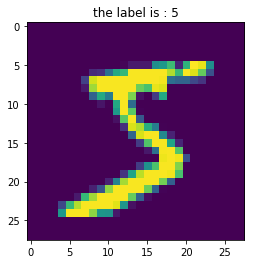

In [8]:
# 测试取出一张图片和对应标签
train_images,train_labels,test_images,test_labels=data_load()
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)
choose_num = 0 # 指定一个编号，你可以修改这里
label = train_labels[choose_num]
image = train_images[choose_num].reshape(28,28)
plt.imshow(image)
plt.title('the label is : {}'.format(label))
plt.show()

**对图像进行归一化操作，有利于后续算法的迭代**

In [9]:
# 图像归一化函数，将数据范围为[0, 255]的图像归一化到[-1, 1]
def norm_img(img):
    # # 验证传入数据格式是否正确，img的shape为[batch_size, 28* 28]
    # assert len(img.shape) == 3
    # batch_size, img_h, img_w = img.shape[0], img.shape[1], img.shape[2]
    # 归一化图像数据
    img = img/127.5 - 1
    # 将图像形式reshape为[batch_size, 784]
    return img

**对图像进行打乱操作，使得每一代的数据顺序都不相同**

In [10]:
# 图像的打乱操作
def shuffle_img(images,labels):
    if type(images)==type([]):
        images=np.array(images)
    number=images.shape[0]
    index_list=list(range(number))
    np.random.shuffle(index_list)
    # print(index_list)
    images_,labels_=[],[]
    for index in index_list:
        images_.append(images[index])
        labels_.append(labels[index])
    return np.array(images_),np.array(labels_)
images=[[1,1],[2,2],[3,3]]
labels=[1,2,3]
images,labels=shuffle_img(images,labels)
print(images,labels)

[[2 2]
 [3 3]
 [1 1]] [2 3 1]


**图像数据氛围若干个小batch，有利于批量分批进行训练**

In [11]:
# 图像分为若干个batch
def batch_img(images,labels,batch_size=16):
    if type(images)==type([]):
        images=np.array(images)
    max_number=images.shape[0]
    max_batch_num=int(max_number/batch_size)+1
    images_,labels_=[],[]
    for k in range(max_batch_num):
        if (k+1)*batch_size<max_number:
            images_.append(images[k*batch_size:(k+1)*batch_size])
            labels_.append(labels[k*batch_size:(k+1)*batch_size])
        else:
            images_.append(images[k*batch_size:])
            labels_.append(labels[k*batch_size:])
    images_,labels_=np.array(images_),np.array(labels_)
    return images_,labels_

**将上述函数封装为一个数据预处理函数dataloader，根据API接口可选择对数据进行的预处理操作**

In [12]:
def dataloader(train_images,train_labels,batch_size=16,shuffle=True,normalization=True):
    if normalization==True:
        train_images=norm_img(train_images)
        print('Hi')
    if shuffle==True:
        train_images,train_labels=shuffle_img(train_images,train_labels)
    train_images,train_labels=batch_img(train_images,train_labels,batch_size=batch_size)
    return train_images,train_labels

### 模型的训练过程
**此过程需要选择优化器、损失函数、学习率、batch_size，训练代数的大小**

In [13]:
def train(model,train_images,train_labels):
    model.train()
    batch_size=128
    lr=0.1
    epoch_num=10
    train_images_,train_labels_=dataloader(train_images,train_labels,batch_size)
    opt = paddle.optimizer.SGD(learning_rate=lr, parameters=model.parameters())
    for epoch in range(epoch_num):
        for batch_id,images in enumerate(train_images_):
            images=images.astype(np.float32)
            labels = train_labels_[batch_id]
            labels=labels.astype(np.int64)
            # print('5:',images.shape)
            # print(images.shape)
            images=np.reshape(images,(images.shape[0],1,28,28))
            images=paddle.to_tensor(images)
            labels=paddle.to_tensor(labels)
            
            #前向计算的过程
            out = model(images)
            # print(f'epoch:{epoch},batch_id:{batch_id}')
            # predicts = paddle.argmax(out, 1)
            # print('####:',predicts)
            # print('111:',labels)
            # 计算损失
            loss = F.cross_entropy(out, labels).astype(np.float32)
            # print('***',loss)
            avg_loss = paddle.mean(loss)
            
            #每训练了100批次的数据，打印下当前Loss的情况
            if batch_id % 100 == 0:
                print("epoch_id: {}, batch_id: {}, loss is: {}".format(epoch, batch_id, avg_loss.numpy()))
            
            #后向传播，更新参数的过程
            opt.clear_grad()
            avg_loss.backward()
            opt.step()
            

### 测试部分
得到模型在测试集上的正确率

In [14]:
def test(model,test_images,test_labels):
    model.eval()
    test_images=np.reshape(test_images,(test_images.shape[0],1,28,28))
    test_images=paddle.to_tensor(test_images).astype(np.float32)
    test_labels=paddle.to_tensor(test_labels).astype(np.int64)
    out=model(test_images)
    predicts = paddle.argmax(out, 1)
    print(predicts)
    print(test_labels)
    accuracy=sum(predicts.numpy()==test_labels.numpy())/np.float32(predicts.shape[0])
    print(f'accuracy:{accuracy}')

### 模型框架的设计
此部分采用的是LeNet_5神经网络，通过paddle中基础模块搭建

In [15]:
class LeNet_5(paddle.nn.Layer):
    def __init__(self, number_classes=10):
        super(LeNet_5, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2D(1, 6, 5, 1, 2),  # 28*28->28*28
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=2, stride=2),  # 28*28->14*14
            nn.Conv2D(6, 16, 5),  # 14*14->10*10
            nn.ReLU(),
            nn.MaxPool2D(2, 2),  # 10*10->5*5
            nn.Conv2D(16, 120, 5),  # 5*5->1*1
            nn.ReLU(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, number_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = paddle.fluid.layers.flatten(x=x, axis=1)
        x = self.classifier(x)
        return x
LeNet_5()

LeNet_5(
  (conv): Sequential(
    (0): Conv2D(1, 6, kernel_size=[5, 5], padding=2, data_format=NCHW)
    (1): ReLU()
    (2): MaxPool2D(kernel_size=2, stride=2, padding=0)
    (3): Conv2D(6, 16, kernel_size=[5, 5], data_format=NCHW)
    (4): ReLU()
    (5): MaxPool2D(kernel_size=2, stride=2, padding=0)
    (6): Conv2D(16, 120, kernel_size=[5, 5], data_format=NCHW)
    (7): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, dtype=float32)
    (1): ReLU()
    (2): Linear(in_features=84, out_features=10, dtype=float32)
  )
)

In [16]:
train_images,train_labels,_,_=data_load()
model=LeNet_5()
train(model,train_images,train_labels)

labels_magic is 2049 
 labels_num is 10000 
 labels is [5 0 4 ... 5 6 8] 

images_magic is 2051 
 images_num is 10000 
 rows is 28 
 cols is 28 
 images is [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Hi


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


epoch_id: 0, batch_id: 0, loss is: [2.6633296]
epoch_id: 0, batch_id: 100, loss is: [0.25718096]
epoch_id: 0, batch_id: 200, loss is: [0.21923105]
epoch_id: 0, batch_id: 300, loss is: [0.09571885]
epoch_id: 0, batch_id: 400, loss is: [0.09047429]
epoch_id: 1, batch_id: 0, loss is: [0.06242875]
epoch_id: 1, batch_id: 100, loss is: [0.03622099]
epoch_id: 1, batch_id: 200, loss is: [0.08506274]
epoch_id: 1, batch_id: 300, loss is: [0.07193452]
epoch_id: 1, batch_id: 400, loss is: [0.04785337]
epoch_id: 2, batch_id: 0, loss is: [0.04427516]
epoch_id: 2, batch_id: 100, loss is: [0.01242902]
epoch_id: 2, batch_id: 200, loss is: [0.03711053]
epoch_id: 2, batch_id: 300, loss is: [0.05325837]
epoch_id: 2, batch_id: 400, loss is: [0.03211253]
epoch_id: 3, batch_id: 0, loss is: [0.03113926]
epoch_id: 3, batch_id: 100, loss is: [0.00762261]
epoch_id: 3, batch_id: 200, loss is: [0.02568649]
epoch_id: 3, batch_id: 300, loss is: [0.04448618]
epoch_id: 3, batch_id: 400, loss is: [0.01538857]
epoch_id:

In [17]:
_,_,test_images,test_labels=data_load()
test(model,test_images,test_labels)
paddle.save(model.state_dict(), 'mnist_in_LeNet5.pdparams')

labels_magic is 2049 
 labels_num is 10000 
 labels is [5 0 4 ... 5 6 8] 

images_magic is 2051 
 images_num is 10000 
 rows is 28 
 cols is 28 
 images is [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Tensor(shape=[10000], dtype=int64, place=CUDAPlace(0), stop_gradient=False,
       [7, 2, 1, ..., 4, 5, 6])
Tensor(shape=[10000], dtype=int64, place=CUDAPlace(0), stop_gradient=True,
       [7, 2, 1, ..., 4, 5, 6])
accuracy:0.9808


# **通过paddle框架极简搭建模型并进行模型训练**
1.通过paddle.vision.datasets.MNIST导入mnist训练集，可选择mode有train和test两种方式，并且可以通过paddle.vision.transforms.Compose对数据集进行变换  

2.通过paddle.vision.models 导入模型**ResNet50**，并且可从paddle.vision.models.resnet选择残差单元BottleneckBlock或BasicBlock  

3.通过paddle.Model()函数对模型进行封装  

4.通过model.prepare()函数选择损失函数、优化器和精度计算方式  

5.通过model.fit进行模型训练，可选择epoch、batch_size  

6.通过paddle.save保存模型的参数  

7.通过model.evaluate进行模型的测试  

8.通过model.predict可以进行模型的预测  

**通过以上步骤我们可以实现模型训练应用的全过程，全过程代码简洁，逻辑清晰，十分便于操作**

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import paddle
from paddle.nn import Linear
import paddle.nn as nn
import paddle.nn.functional as F
from paddle.vision.models import ResNet
from paddle.vision.models.resnet import BottleneckBlock, BasicBlock
from paddle.vision.transforms import Compose, Normalize
%matplotlib inline

paddle.device.set_device("gpu:0")

# 加载数据集
transform = Compose([Normalize(mean=[127.5],
                               std=[127.5],
                               data_format='CHW')])
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

# 模型封装
model=resnet50 = ResNet(BasicBlock,50,10)
model.conv1=nn.Conv2D(1,64,kernel_size=7,stride=2,padding=3)
model = paddle.Model(model)

# 为模型训练做准备，设置优化器，损失函数和精度计算方式
model.prepare(optimizer=paddle.optimizer.Adam(learning_rate=0.001,parameters=model.parameters()),
              loss=paddle.nn.CrossEntropyLoss(),
              metrics=paddle.metric.Accuracy())
              
# 启动模型训练，指定训练数据集，设置训练轮次，设置每次数据集计算的批次大小，设置日志格式
model.fit(train_dataset,
          epochs=2,
          batch_size=64,
          verbose=1)
model.save('mnist_in_Resnet.pdparams')        
# 用 evaluate 在测试集上对模型进行验证
eval_result = model.evaluate(test_dataset, verbose=1)

# 用 predict 在测试集上对模型进行测试
test_result = model.predict(test_dataset)


The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/2


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/nn/layer/norm.py:641: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


step 938/938 [==============================] - loss: 0.0623 - acc: 0.9470 - 36ms/step         
Epoch 2/2
step 938/938 [==============================] - loss: 0.0348 - acc: 0.9800 - 36ms/step        
Eval begin...
step  2320/10000 [=====>........................] - loss: 2.5630e-05 - acc: 0.9384 - ETA: 2:04 - 16ms/st